In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
os.getcwd()

'/home/sam/tbi_ct_lesion_segmentation'

In [21]:
#results_dir = "results"
results_dir = os.path.join("..", "nihvandy", "ct_seg", "vu_results", "results")

In [22]:
os.listdir(results_dir)

['nih_weights', 'vu_weights', 'multi_weights']

In [23]:
training_patterns = [os.path.join(results_dir, x) for x in os.listdir(results_dir)
                    if not os.path.isdir(x)]

In [24]:
training_patterns

['../nihvandy/ct_seg/vu_results/results/nih_weights',
 '../nihvandy/ct_seg/vu_results/results/vu_weights',
 '../nihvandy/ct_seg/vu_results/results/multi_weights']

In [25]:
result_files = [[os.path.join(training_pattern, x) for x in os.listdir(training_pattern) if "result" in x]
               for training_pattern in training_patterns]
result_files = [x for x in result_files if len(x) != 0 ]
result_files

[['../nihvandy/ct_seg/vu_results/results/nih_weights/result_nih_2018-07-16_16-51-46_epoch_0222_val_dice_coef_0.9707_weights.csv'],
 ['../nihvandy/ct_seg/vu_results/results/vu_weights/result_vu_2018-07-19_10-22-02_epoch_0238_val_dice_coef_0.9656_weights.csv'],
 ['../nihvandy/ct_seg/vu_results/results/multi_weights/result_multisite_2018-07-23_01:48:27_val_dice_coef_0.9655_weights.csv']]

In [26]:
nih_results = [x[0] for x in result_files if "nih_weights" in x[0]][0]
vu_results = [x[0] for x in result_files if "vu_weights" in x[0]][0]
multi_results = [x[0] for x in result_files if "multi_weights" in x[0]][0]

In [27]:
nih_df = pd.read_csv(nih_results)
vu_df = pd.read_csv(vu_results)
multi_df = pd.read_csv(multi_results)

In [28]:
weight_site="Training Location"
nih_df = nih_df.assign(weight_site="NIH")
vu_df = vu_df.assign(weight_site="VU")
multi_df = multi_df.assign(weight_site='Multi-Site')

In [29]:
merged = pd.concat([nih_df, vu_df, multi_df], keys=['NIH', 'VU', 'Multi-Site'])

In [30]:
merged.columns = ['filename', 'Dice Coefficient', 'thresholded volume(mm)',
       'thresholded volume ground truth(mm)',
       'largest hematoma ground truth(mm)', 'largest hematoma prediction(mm)',
       'severe hematoma ground truth', 'severe hematoma pred', 'vox dim 1(mm)',
       'vox dim 2(mm)', 'vox dim 3(mm)', 'probability vol(mm)',
       'probability volume(voxels)', 'thresholded volume(voxels)',
       'Training Location']

In [31]:
merged

filename  Dice Coefficient  \
NIH        0  CQS_TBI10071_CT.nii.gz          0.817201   
           1  CQS_TBI10346_CT.nii.gz          0.805213   
           2  CQS_TBI10880_CT.nii.gz          0.628441   
           3  CQS_TBI11365_CT.nii.gz          0.660849   
           4  CQS_TBI12874_CT.nii.gz          0.786718   
           5  CQS_TBI13819_CT.nii.gz          0.680342   
           6  CQS_TBI14468_CT.nii.gz          0.574633   
           7  CQS_TBI15110_CT.nii.gz          0.563539   
VU         0  CQS_TBI10071_CT.nii.gz          0.827504   
           1  CQS_TBI10346_CT.nii.gz          0.805223   
           2  CQS_TBI10880_CT.nii.gz          0.738406   
           3  CQS_TBI11365_CT.nii.gz          0.758664   
           4  CQS_TBI12874_CT.nii.gz          0.816920   
           5  CQS_TBI13819_CT.nii.gz          0.727084   
           6  CQS_TBI14468_CT.nii.gz          0.640037   
           7  CQS_TBI15110_CT.nii.gz          0.644497   
Multi-Site 0  CQS_TBI10071_CT.nii.gz          0.848872   
           1  CQS_TBI10346_CT.nii.gz          0.821743   
           2  CQS_TBI10880_CT.nii.gz          0.662095   
           3  CQS_TBI11365_CT.nii.gz          0.674920   
           4  CQS_TBI12874_CT.nii.gz          0.795565   
           5  CQS_TBI13819_CT.nii.gz          0.730316   
           6  CQS_TBI14468_CT.nii.gz          0.639372   
           7  CQS_TBI15110_CT.nii.gz          0.625542   

              thresholded volume(mm)  thresholded volume ground truth(mm)  \
NIH        0            35989.801549                         34621.557593   
           1            46158.073655                         38196.430839   
           2            32184.559097                         25183.976669   
           3            57380.815086                         76481.080487   
           4            69008.811074                         69447.740524   
           5            52043.107325                         37141.024195   
           6            53370.535097                         29943.410226   
           7            58869.005264                         49917.515247   
VU         0            34435.986045                         34621.557593   
           1            46549.629859                         38196.430839   
           2            27264.862289                         25183.976669   
           3            62596.591508                         76481.080487   
           4            64502.077257                         69447.740524   
           5            50807.237450                         37141.024195   
           6            56889.130749                         29943.410226   
           7            51959.798374                         49917.515247   
Multi-Site 0            37142.006986                         34621.557593   
           1            43627.734035                         38196.430839   
           2            23947.720184                         25183.976669   
           3            56289.648471                         76481.080487   
           4            65259.560856                         69447.740524   
           5            46518.634650                         37141.024195   
           6            48300.383873                         29943.410226   
           7            59705.720119                         49917.515247   

              largest hematoma ground truth(mm)  \
NIH        0                       32484.715059   
           1                       31019.131740   
           2                       23815.229340   
           3                       76008.241620   
           4                       64474.185419   
           5                       37141.024195   
           6                       29943.410226   
           7                       32330.972618   
VU         0                       32484.715059   
           1                       31019.131740   
           2                       23815.229340   
           3                       7600

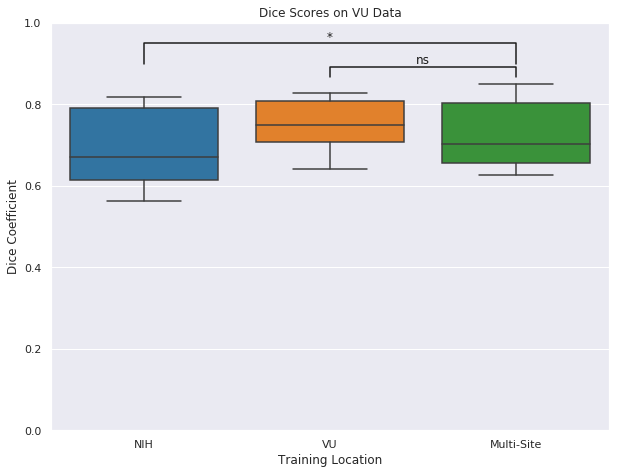

In [36]:
sns.set(rc={'figure.figsize':(10,7.5)})

ax = sns.boxplot(x="Training Location", y="Dice Coefficient", data=merged, palette="tab10", saturation=0.75
                #).set_title("Dice Scores on NIH Data"
                ).set_title("Dice Scores on VU Data"
                )
fig = ax.get_figure()
plt.ylim(0, 1)


x1, x2 = 0, 2   # columns 'nih' and 'multi' (first column: 0, see plt.xticks())
y, h, col = merged['Dice Coefficient'].max() + 0.05, 0.05, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)

x1, x2 = 1, 2   # columns 'nih' and 'multi' (first column: 0, see plt.xticks())
y, h, col = merged['Dice Coefficient'].max() + 0.0175, 0.025, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

fig.savefig("vu_data_boxplot.png")
#fig.savefig("nih_data_boxplot.png")

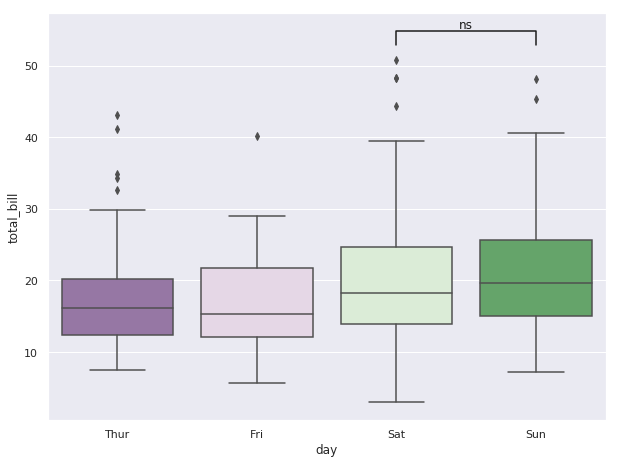

In [15]:
tips = sns.load_dataset("tips")
sns.boxplot(x="day", y="total_bill", data=tips, palette="PRGn")

# statistical annotation
x1, x2 = 2, 3   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
y, h, col = tips['total_bill'].max() + 2, 2, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)

plt.show()

In [16]:
# This will be the best way to show the Dice scores as a box plot in the end
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                 data=tips, palette="Set3")

In [17]:
from scipy.stats import wilcoxon

In [18]:
print("Wilcoxon between NIH weights, Multi weights")
print(wilcoxon(nih_df['dice'], multi_df['dice']))

Wilcoxon between NIH weights, Multi weights
WilcoxonResult(statistic=2.0, pvalue=0.009344113002204883)


In [19]:
print("Wilcoxon between VU weights, Multi weights")
print(wilcoxon(vu_df['dice'], multi_df['dice']))

Wilcoxon between VU weights, Multi weights
WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)
